<a href="https://colab.research.google.com/github/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generates subplots in figure 1**

This notebook generates 6 subfigures: The 2 histograms in fig 1A, the two histograms in fig 1B I, and the plots in fig 1B II and III.

Steps:
1. Download the code and processed data
2. Setup the R environment
3. Generate the figures

The data for these figures are produced by the following notebooks:

Processing of FASTQ files with kallisto and bustools:
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVAL.ipynb

Preprocessing of BUG files:
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVAL.ipynb

Precalculate figure 1 data: https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFig1Data%20.ipynb




**1. Download the code and processed data**

In [ ]:
#download the R code
![ -d "GRNP_2020" ] && rm -r GRNP_2020

!git clone https://github.com/pachterlab/GRNP_2020.git


Cloning into 'GRNP_2020'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 1131 (delta 168), reused 85 (delta 47), pack-reused 883
Receiving objects: 100% (1131/1131), 7.48 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (722/722), done.


In [ ]:
#download processed data from Zenodo
![ -d "figureData" ] && rm -r figureData
!mkdir figureData
!cd figureData && wget https://zenodo.org/record/3909758/files/FigureData.zip?download=1 && unzip 'FigureData.zip?download=1' && rm 'FigureData.zip?download=1'

!cd figureData && wget https://zenodo.org/record/3909758/files/EVAL.zip?download=1 && unzip 'EVAL.zip?download=1' && rm 'EVAL.zip?download=1'


--2020-07-02 21:42:44--  https://zenodo.org/record/3909758/files/FigureData.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4901056 (4.7M) [application/octet-stream]
Saving to: ‘FigureData.zip?download=1’

FigureData.zip?down 100%[===================>]   4.67M  5.26MB/s    in 0.9s    

2020-07-02 21:42:46 (5.26 MB/s) - ‘FigureData.zip?download=1’ saved [4901056/4901056]

Archive:  FigureData.zip?download=1
  inflating: extreme_genes.txt       
 extracting: Fig1_h1.RDS             
 extracting: Fig1_h2.RDS             
 extracting: Fig1_r1_III.RDS         
 extracting: Fig1_r2_III.RDS         
  inflating: Fig3_ldata.RDS          
  inflating: Fig3_ldata2.RDS         
  inflating: Fig4_d1.RDS             
  inflating: PBMC_V3_3_ds10_20Times.RData  
--2020-07-02 21:42:47--  https://zenodo.org/record/3909758/files/EVAL.zip?download=1
Resolving

In [ ]:
#Check that download worked
!cd figureData && ls -l && cd EVAL && ls -l

total 4820
drwxr-xr-x 2 root root    4096 Jul  1 19:49 EVAL
-rw-r--r-- 1 root root    1422 Jul  1 19:49 extreme_genes.txt
-rw-r--r-- 1 root root     683 Jun 30 16:55 Fig1_h1.RDS
-rw-r--r-- 1 root root     830 Jun 30 16:55 Fig1_h2.RDS
-rw-r--r-- 1 root root     239 Jun 30 18:19 Fig1_r1_III.RDS
-rw-r--r-- 1 root root     233 Jun 30 18:19 Fig1_r2_III.RDS
-rw-r--r-- 1 root root  338635 Jul  1 18:16 Fig3_ldata2.RDS
-rw-r--r-- 1 root root  480081 Jul  1 18:16 Fig3_ldata.RDS
-rw-r--r-- 1 root root 3949987 Jul  1 19:08 Fig4_d1.RDS
-rw-r--r-- 1 root root  133329 Jul  1 17:57 PBMC_V3_3_ds10_20Times.RData
total 212788
-rw-r--r-- 1 root root 37523336 Jun 30 13:45 Bug_100.RData
-rw-r--r-- 1 root root 17301493 Jun 30 13:42 Bug_10.RData
-rw-r--r-- 1 root root 23443334 Jun 30 13:42 Bug_20.RData
-rw-r--r-- 1 root root 25288320 Jun 30 13:42 Bug_25.RData
-rw-r--r-- 1 root root 29057075 Jun 30 13:43 Bug_40.RData
-rw-r--r-- 1 root root 11226736 Jun 30 13:41 Bug_5.RData
-rw-r--r-- 1 root root 32629892 Jun 3

**2. Prepare the R environment**

In [ ]:
#switch to R mode
%reload_ext rpy2.ipython


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
#install the R packages and setup paths
%%R
install.packages("dplyr")
install.packages("ggplot2")
install.packages("ggpubr")
install.packages("preseqR")



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 836651 bytes (817 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

**3. Generate the figures**


In [ ]:
#First set some path variables
%%R
source("GRNP_2020/RCode/pathsGoogleColab.R")


In [ ]:
#Import helpers (available in other notebooks)
%%R
source(paste0(sourcePath,"ButterflyHelpers.R"))
source(paste0(sourcePath,"ggplotHelpers.R"))
source(paste0(sourcePath,"modZTNB.R"))





In [ ]:
#create figure directory
![ -d "figures" ] && rm -r figures
!mkdir figures

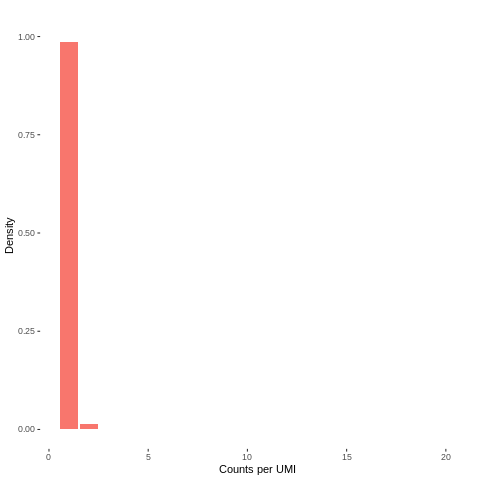

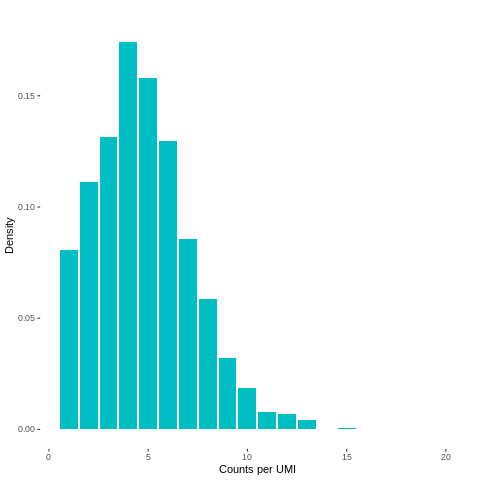

In [ ]:
#Create and save the figures
%%R
library(ggplot2)
library(ggpubr)

loadStats("EVAL")

################################
#Fig 1B, I - histograms per gene 
################################

colors = gg_color_hue(2)

#read precalculated histograms
h1 = readRDS(paste0(figure_data_path, "Fig1_h1.RDS"))
h2 = readRDS(paste0(figure_data_path, "Fig1_h2.RDS"))

df1 = data.frame(x = 1:20, y = h1$density[1:20])#30 for full
fig1B_I_1 = ggplot(df1,aes(x=x,y=y)) +
  geom_bar(stat="identity", fill = colors[1]) +
  labs(y="Density", x="Counts per UMI", title="") +
  theme(panel.background = element_rect("white", "white", 0, 
                                          0, "white"))
print(fig1B_I_1)

df2 = data.frame(x = 1:20, y = h2$density[1:20])#30 for full
fig1B_I_2 = ggplot(df2,aes(x=x,y=y)) +
  geom_bar(stat="identity", fill = colors[2]) +
  labs(y="Density", x="Counts per UMI", title="") +
  theme(panel.background = element_rect("white", "white", 0, 
                                        0, "white"))
print(fig1B_I_2)

ggsave(
  paste0(figure_path, "fig1B_I_1.png"),
  plot = fig1B_I_1, device = "png",
  width = 3, height = 2.4, dpi = 300)

ggsave(
  paste0(figure_path, "fig1B_I_2.png"),
  plot = fig1B_I_2, device = "png",
  width = 3, height = 2.4, dpi = 300)








[1] "Prediction Gene 1: 6.51460104759028"
[1] "Prediction Gene 2: 5.37527053810671"


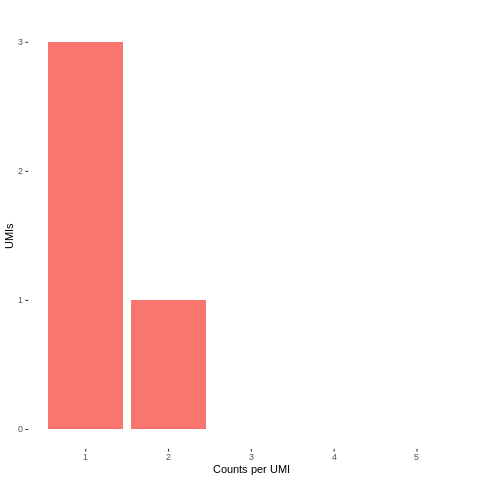

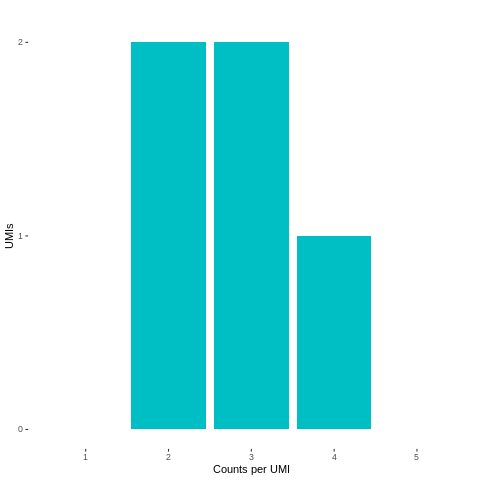

In [ ]:
%%R
###########################
# CU histograms for Fig 1A
###########################

h3 = c(3,1,0,0,0)
df1_1 = data.frame(x = 1:5, y = h3)
fig1A_1 = ggplot(df1_1,aes(x=x,y=y)) +
  geom_bar(stat="identity", fill = colors[1]) +
  scale_y_continuous(breaks = c(0,1,2,3)) +
  labs(y="UMIs", x="Counts per UMI", title="") +
  theme(panel.background = element_rect("white", "white", 0, 
                                        0, "white"))
print(fig1A_1)

ggsave(
  paste0(figure_path, "fig1A_1.png"),
  plot = fig1A_1, device = "png",
  width = 2, height = 2, dpi = 300)


h4 = c(0,2,2,1,0)
df1_2 = data.frame(x = 1:5, y = h4)
fig1A_2 = ggplot(df1_2, aes(x=x,y=y)) +
  geom_bar(stat="identity", fill = colors[2]) +
  scale_y_continuous(breaks = c(0,1,2)) +
  labs(y="UMIs", x="Counts per UMI", title="") +
  theme(panel.background = element_rect("white", "white", 0, 
                                        0, "white"))
print(fig1A_2)

ggsave(
  paste0(figure_path, "fig1A_2.png"),
  plot = fig1A_2, device = "png",
  width = 2, height = 2, dpi = 300)

#predict h3 and h4
dd1_1 = as.matrix(data.frame(1:5,h3));
rSAC1_1 = mod.ztnb.rSAC(dd1_1, incTol = 1e-5, iterIncTol = 200);

print(paste0("Prediction Gene 1: ",rSAC1_1(2)))#6.514601


dd1_2 = as.matrix(data.frame(1:5,h4));
rSAC1_2 = mod.ztnb.rSAC(dd1_2, incTol = 1e-5, iterIncTol = 200);
print(paste0("Prediction Gene 2: ",rSAC1_2(2)))#5.375271 

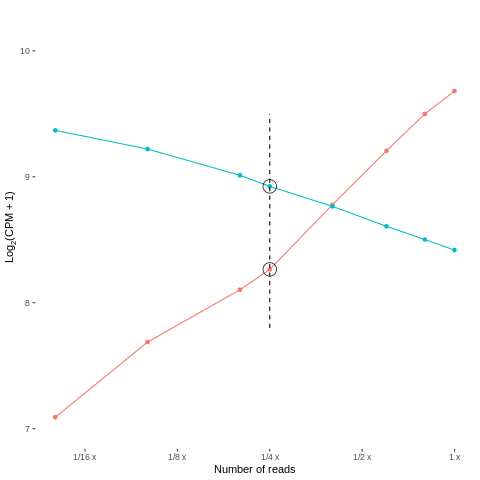

In [ ]:
#Fig 1 B II:
############
%%R
r1 = data.frame(statsEVAL)[statsEVAL$gene == "Vmn1r13",]
r2 = data.frame(statsEVAL)[statsEVAL$gene == "Ubb",]

data1 = c(r1$CPM_EVAL_d_5, r1$CPM_EVAL_d_10, r1$CPM_EVAL_d_20, r1$CPM_EVAL_d_25, r1$CPM_EVAL_d_40, r1$CPM_EVAL_d_60, r1$CPM_EVAL_d_80, r1$CPM_EVAL_d_100)
data2 = c(r2$CPM_EVAL_d_5, r2$CPM_EVAL_d_10, r2$CPM_EVAL_d_20, r2$CPM_EVAL_d_25, r2$CPM_EVAL_d_40, r2$CPM_EVAL_d_60, r2$CPM_EVAL_d_80, r2$CPM_EVAL_d_100)

data=c(data1,data2)
logData = log2(data + 1)
gene = factor(c(rep(0,8),rep(1,8)), c(0,1), c("Vmn1r13", "Ubb"))
x = c(0.05,0.1,0.2,0.25,0.4,0.6,0.8,1);
df = data.frame(data=logData, Gene=gene, x=log2(x))

dfline = data.frame(x=c(log2(0.25), log2(0.25)), data=c(7.8, 9.5) )
dfmark = df[df$x == log2(0.25),]

fig1B_II = ggplot(df, aes(x=x, y=data, colour = Gene)) + 
  geom_line() + geom_point() +
  ylab(expression(Log[2]*"(CPM + 1)")) +
  geom_line(data=dfline, color="black", linetype=2) +
  geom_point(data=dfmark, size=6, shape=1, color="black") +
  #scale_x_continuous(name="Number of reads", breaks = c(log2(0.05), -3, -2, -1, 0), labels = c("1x", "2.5x", "5x", "10x", "20x")) +
  scale_x_continuous(name="Number of reads", breaks = c(log2(0.0625), log2(0.125), log2(0.25), log2(0.5), log2(1)), labels = c("1/16 x", "1/8 x", "1/4 x", "1/2 x", "1 x")) +
  ylim(c(7,10.2)) +
  theme(panel.background = element_rect("white", "white", 0, 
                                        0, "white"), legend.position= "none")

print(fig1B_II)

ggsave(
  paste0(figure_path, "fig1B_II.png"),
  plot = fig1B_II, device = "png",
  width = 3, height = 3, dpi = 300)


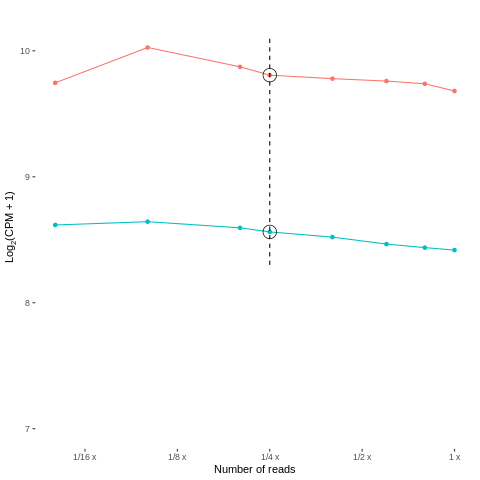

In [ ]:
#fig1B_III
###############
#create prediction data
%%R
#load precalculated prediction data
data1 = unlist(readRDS(paste0(figure_data_path, "Fig1_r1_III.RDS"))[2:9]) #skip the gene column
data2 = unlist(readRDS(paste0(figure_data_path, "Fig1_r2_III.RDS"))[2:9]) #skip the gene column

data=c(data1,data2)
logData = log2(data + 1)
gene = factor(c(rep(0,8),rep(1,8)), c(0,1), c("Gene 1 - Vmn1r13", "Gene 2 - Ubb"))
x = c(0.05,0.1,0.2,0.25,0.4,0.6,0.8,1);
df = data.frame(data=logData, Gene=gene, x=log2(x))
dfline = data.frame(x=c(log2(0.25), log2(0.25)), data=c(8.3, 10.13) )
dfmark = df[df$x == log2(0.25),]

fig1B_III = ggplot(df, aes(x=x, y=data, colour = Gene)) + 
  geom_line() + geom_point() +
  ylab(expression(Log[2]*"(CPM + 1)")) +
  geom_line(data=dfline, color="black", linetype=2) +
  geom_point(data=dfmark, size=6, shape=1, color="black") +
  ylim(c(7,10.2)) +
  scale_x_continuous(name="Number of reads", breaks = c(log2(0.0625), log2(0.125), log2(0.25), log2(0.5), log2(1)), labels = c("1/16 x", "1/8 x", "1/4 x", "1/2 x", "1 x")) +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"), legend.position= "none")

print(fig1B_III)

ggsave(
  paste0(figure_path, "fig1B_III.png"),
  plot = fig1B_III, device = "png",
  width = 3, height = 3, dpi = 300)

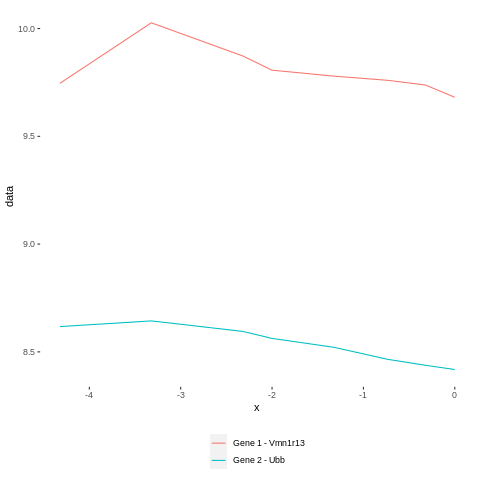

In [ ]:
#create a plot with Legend - copy the legend from here...
#uses data from previous plot
%%R
fig1B_Legend = ggplot(df, aes(x=x, y=data, colour = Gene)) + 
  geom_line() +
  theme(panel.background = element_rect("white", "white", 0, 
        0, "white"),legend.position= "bottom", legend.direction = "vertical", legend.title = element_blank())

print(fig1B_Legend)

ggsave(
  paste0(figure_path, "fig1B_Legend.png"),
  plot = fig1B_Legend, device = "png",
  width = 3, height = 3, dpi = 300)


In [ ]:
####################################
#Produce some data for the main text
####################################
%%R

dsExpr = statsEVAL$CPM_EVAL_d_5
fullExpr = statsEVAL$CPM_EVAL_d_100
gene1 = statsEVAL$gene == "Vmn1r13"
gene2 = statsEVAL$gene == "Ubb"
print(paste0("FC full dataset (gene 1/2):", fullExpr[gene1]/fullExpr[gene2]))#2.404394
print(paste0("FC downsampled (0.05) dataset (gene 2/1):", dsExpr[gene2]/dsExpr[gene1]))#4.876712

#get the full number of reads
loadBug("EVAL", 1)
print(paste0("Total reads full dataset: ", sum(bug_EVAL_100$count)))#29913038
rmBug("EVAL", 1)

#get the downsampled number of reads
loadBug("EVAL", 0.05)
print(paste0("Total reads downsampled (0.05) dataset: ", sum(bug_EVAL_5$count)))#1495651
rmBug("EVAL", 0.05)


[1] "FC full dataset (gene 1/2):2.40439381611066"
[1] "FC downsampled (0.05) dataset (gene 2/1):4.87671232876712"
[1] "Total reads full dataset: 29913038"
[1] "Total reads downsampled (0.05) dataset: 1495651"
